# Medical Insurance Premium  Predictor

# About Dataset:
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


# Data Collection:
The data has bean referred from:https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

Step 1: Data Collection and Exploration

In [ ]:
# Data Handling
import pandas as pd          # For loading and handling datasets
import numpy as np           # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt    # Basic plotting
import seaborn as sns              # Advanced plots, heatmaps, etc.

import warnings
warnings.filterwarnings('ignore')   # Ignore warnings for cleaner output
%matplotlib inline

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder      # Encode categorical variables
from sklearn.preprocessing import StandardScaler    # Scale numerical features

# NLP
import re                                        # Regular Expressions  -->  Clean raw text (remove unwanted characters and symbols)
import nltk                                      # NLP toolkit -->  Provides tools for tokenization and linguistic preprocessing
from nltk.corpus import stopwords                # Word filtering -->  Removes unimportant common words (e.g., “the”, “is”, “and”)
from nltk.stem import WordNetLemmatizer          # Lemmatization -->  Converts words to their root form (e.g., “injuries” → “injury”)

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split   # Split data into train/test
from sklearn.model_selection import cross_val_score    # Cross-validation
from sklearn.model_selection import GridSearchCV       # Hyperparameter tuning

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Metrics / Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



Summary:

pandas, numpy → Data handling

matplotlib, seaborn → EDA & visualization

sklearn.preprocessing → Data cleaning & scaling

sklearn.model_selection → Train-test split, CV, hyperparameter tuning

sklearn.metrics → Model evaluation

sklearn / xgboost → Modeling

streamlit → Deployment

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.shape


(1338, 7)

In [ ]:
import random
# Function to generate claim descriptions
def generate_claim_description(expense):
    if expense > 30000:
        return random.choice([
            "Severe car accident with multiple fractures",
            "Major surgery following workplace injury",
            "Critical illness claim - cancer treatment",
            "Hospitalization due to severe infection"
        ])
    elif expense > 10000:
        return random.choice([
            "Moderate injury from car accident",
            "Slip and fall - minor fracture",
            "Hospital stay for routine surgery",
            "Sports injury requiring short recovery"
        ])
    else:
        return random.choice([
            "Minor injury claim",
            "Doctor visit for checkup",
            "Outpatient treatment for flu",
            "Small medical claim for prescription"
        ])

# Function to generate medical notes
def generate_medical_notes(bmi, smoker):
    notes = []
    if smoker == 'yes':
        notes.append("Smoker, higher risk of lung issues")
    if bmi > 30:
        notes.append("Obese, potential risk for heart disease")
    elif bmi > 25:
        notes.append("Overweight, moderate health risk")
    else:
        notes.append("Healthy weight range")
    notes.append(random.choice([
        "No chronic illness",
        "History of hypertension",
        "Diabetes under control",
        "Asthma under observation"
    ]))
    return ". ".join(notes)

# Function to generate feedback
def generate_feedback(expense):
    if expense > 30000:
        return random.choice([
            "Claim took long time but approved",
            "Satisfied with process despite delay",
            "Very stressful experience but finally resolved"
        ])
    elif expense > 10000:
        return random.choice([
            "Happy with quick approval",
            "Process was smooth",
            "Good communication from company"
        ])
    else:
        return random.choice([
            "Quick claim, no issues",
            "Simple and efficient service",
            "Very satisfied with process"
        ])

# Apply functions to generate NLP columns
df['claim_description'] = df['expenses'].apply(generate_claim_description)
df['medical_notes'] = df.apply(lambda x: generate_medical_notes(x['bmi'], x['smoker']), axis=1)
df['feedback'] = df['expenses'].apply(generate_feedback)

# Save the enriched dataset
df.to_csv("insurance_with_text.csv", index=False)

df.head()


,age,sex,bmi,children,smoker,region,expenses,claim_description,medical_notes,feedback
0,19,female,27.9,0,yes,southwest,16884.92,Slip and fall - minor fracture,"Smoker, higher risk of lung issues. Overweight...",Happy with quick approval
1,18,male,33.8,1,no,southeast,1725.55,Doctor visit for checkup,"Obese, potential risk for heart disease. Asthm...",Simple and efficient service
2,28,male,33.0,3,no,southeast,4449.46,Small medical claim for prescription,"Obese, potential risk for heart disease. Diabe...","Quick claim, no issues"
3,33,male,22.7,0,no,northwest,21984.47,Hospital stay for routine surgery,Healthy weight range. History of hypertension,Happy with quick approval
4,32,male,28.9,0,no,northwest,3866.86,Minor injury claim,"Overweight, moderate health risk. Diabetes und...","Quick claim, no issues"


In [8]:
df.shape

(1338, 10)

Step 2: Data Cleaning & Transformation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1338 non-null   int64  
 1   sex                1338 non-null   object 
 2   bmi                1338 non-null   float64
 3   children           1338 non-null   int64  
 4   smoker             1338 non-null   object 
 5   region             1338 non-null   object 
 6   expenses           1338 non-null   float64
 7   claim_description  1338 non-null   object 
 8   medical_notes      1338 non-null   object 
 9   feedback           1338 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 104.7+ KB


From the above, we can see that the dataset contains 2 columns with float values 6 with categorical values and the rest contains integer values

In [10]:
df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
df.isnull().sum()

age                  0
sex                  0
bmi                  0
children             0
smoker               0
region               0
expenses             0
claim_description    0
medical_notes        0
feedback             0
dtype: int64

No missing values in any column.

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Identify column types
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'region', 'smoker']
text_features = ['claim_description', 'medical_notes', 'feedback']


# Check their counts
print('Numerical features:', num_features)
print('Number of numeric features:', len(num_features))

print('Categorical features:', cat_features)
print('Number of categorical features:', len(cat_features))

print('Text features:', text_features)
print('Number of text features:', len(text_features))


Numerical features: ['age', 'bmi', 'children']
Number of numeric features: 3
Categorical features: ['sex', 'region', 'smoker']
Number of categorical features: 3
Text features: ['claim_description', 'medical_notes', 'feedback']
Number of text features: 3


In [14]:
for col in cat_features:
    print(f"{col} unique values:", df[col].unique())
   

sex unique values: ['female' 'male']
region unique values: ['southwest' 'southeast' 'northwest' 'northeast']
smoker unique values: ['yes' 'no']


3.	Exploratory Data Analysis (EDA):

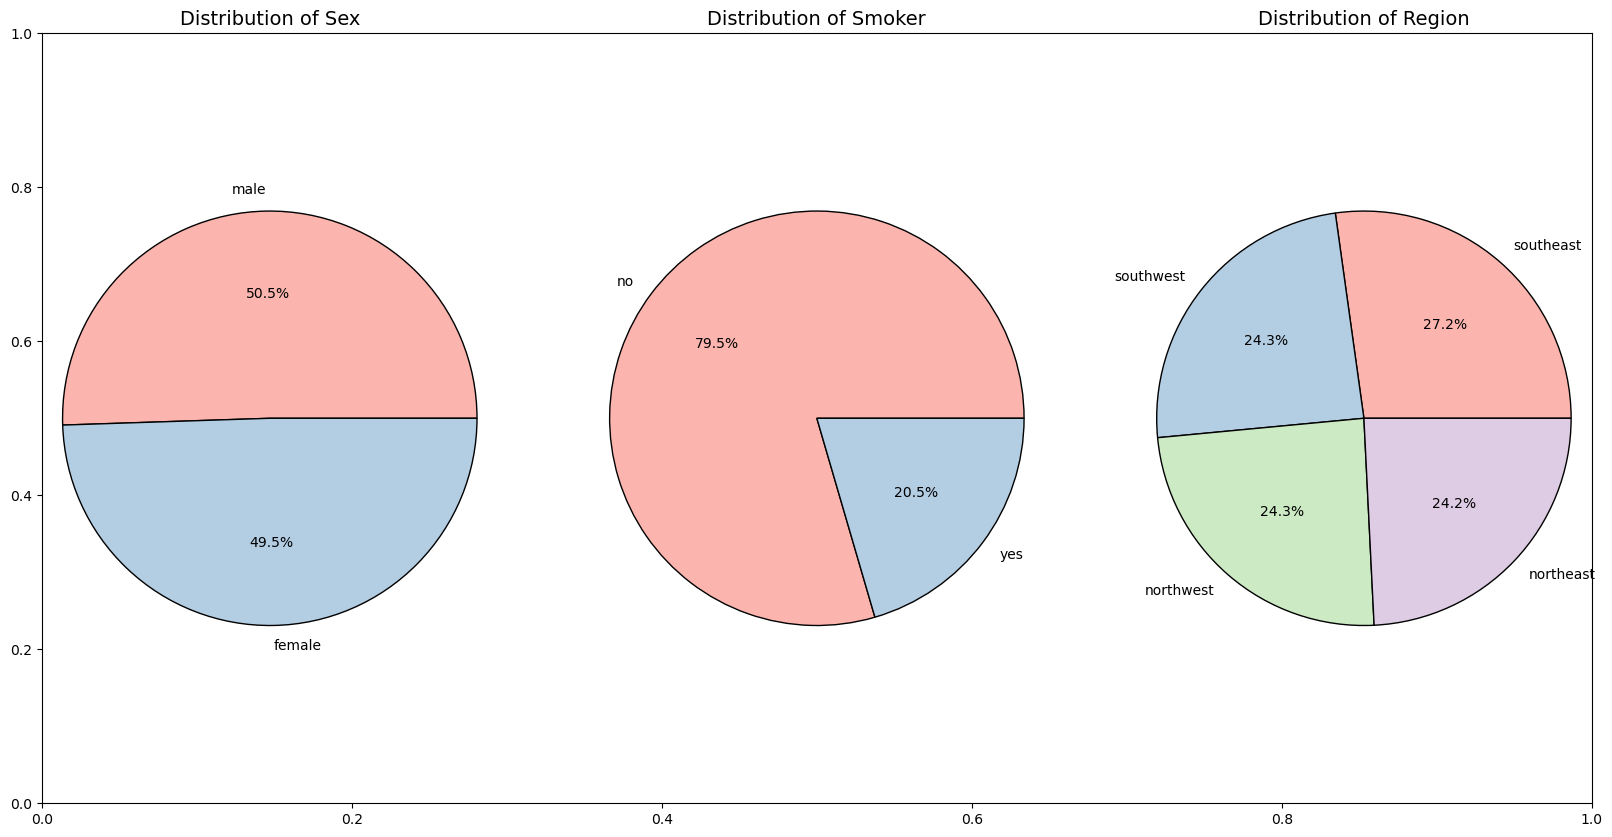

In [15]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%', 
            colors=plt.cm.Pastel1.colors,
            wedgeprops={'edgecolor': 'black'})
    
    
    
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.axis('equal')  # Ensures perfect circl

plt.show()


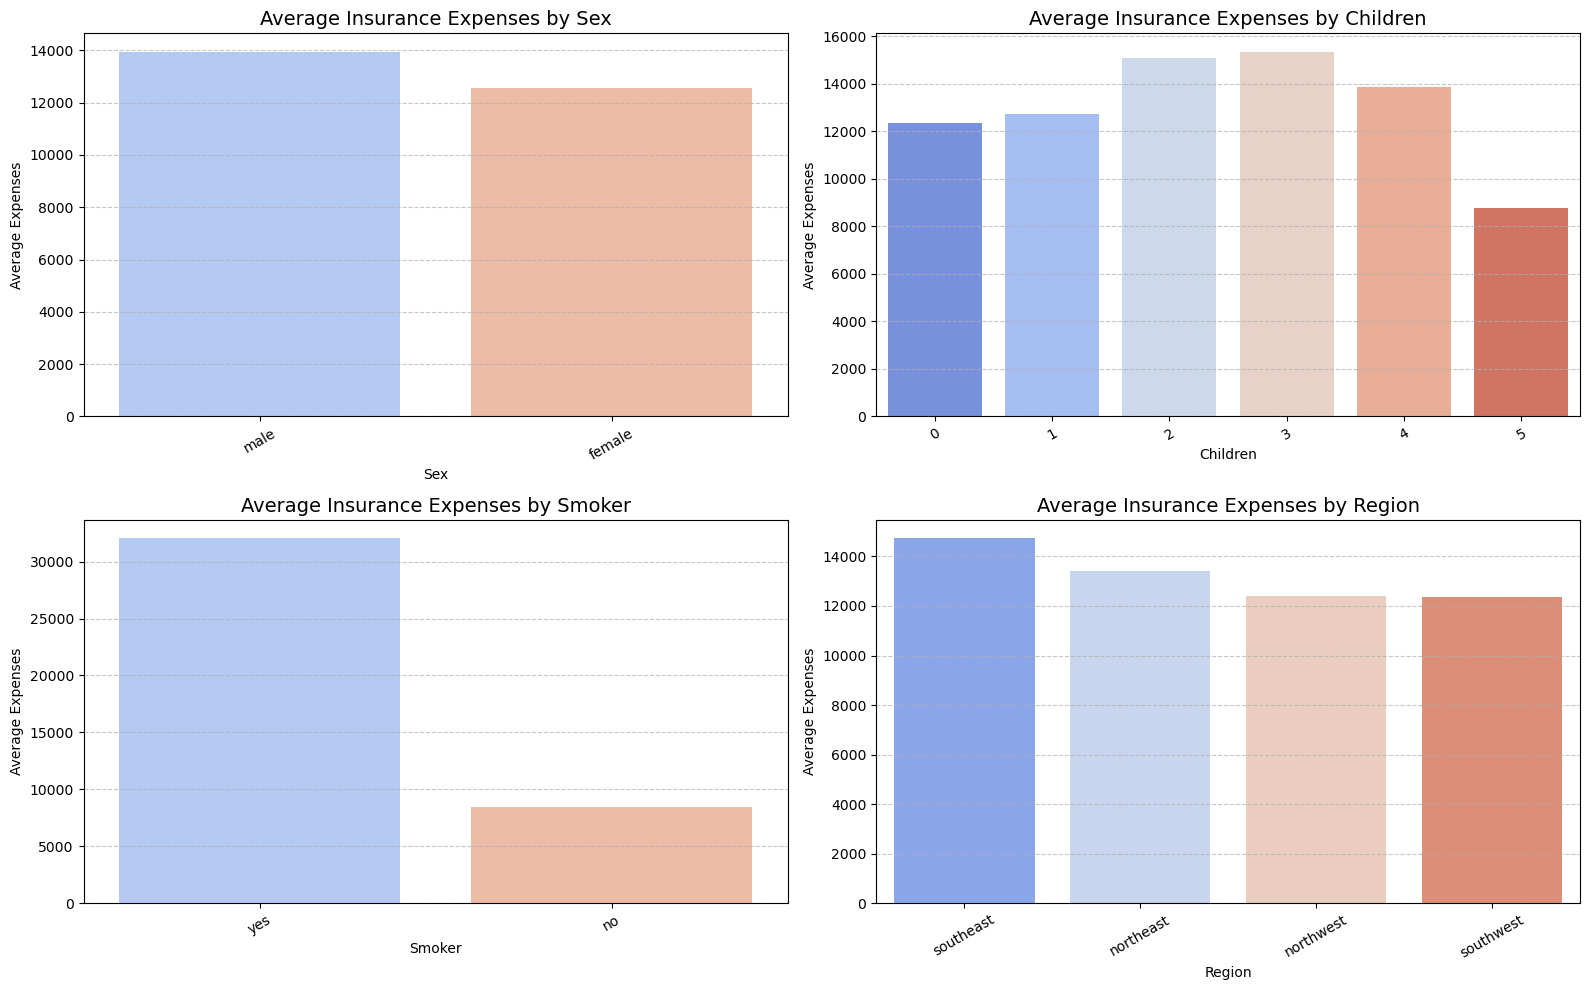

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['sex', 'children', 'smoker', 'region']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    mean_expenses = df.groupby(col)['expenses'].mean().astype(float).sort_values(ascending=False)
    sns.barplot(x=mean_expenses.index, y=mean_expenses.values, palette='coolwarm')
    plt.title(f'Average Insurance Expenses by {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Expenses')
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


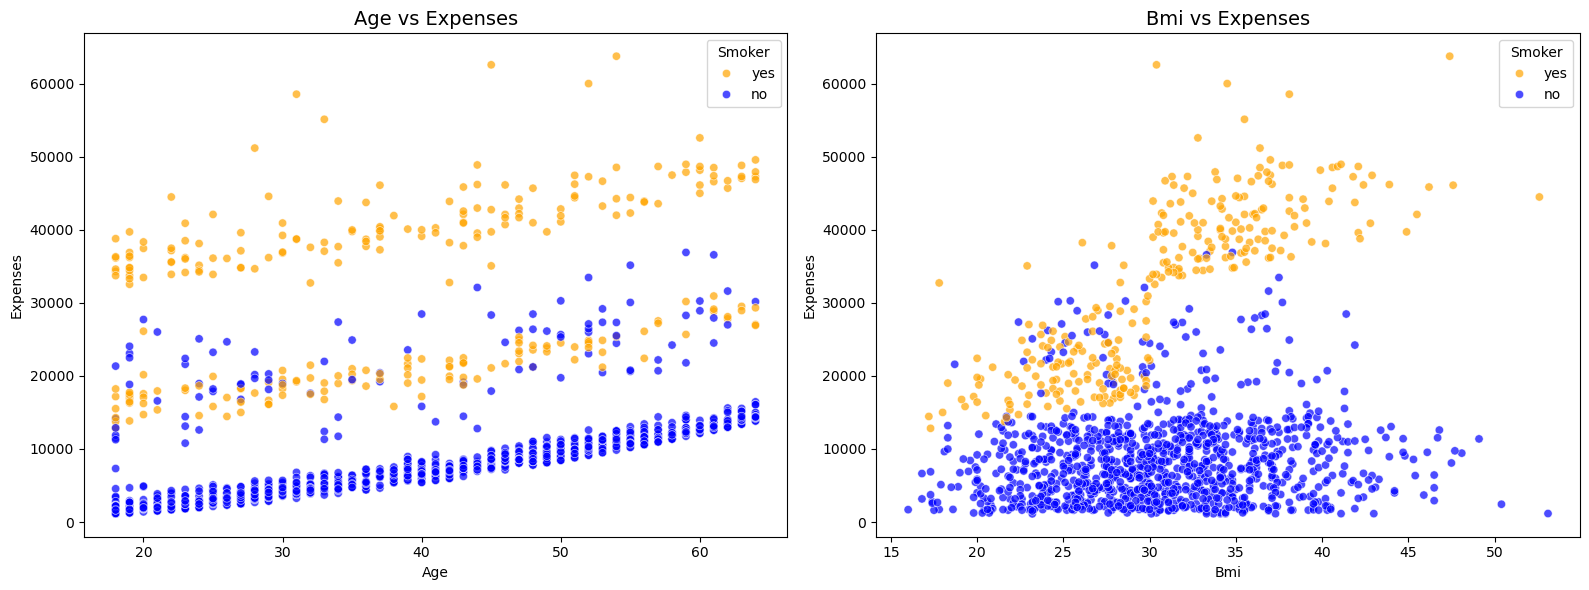

In [17]:
features = ['age', 'bmi']

plt.figure(figsize=(16, 6))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(
        data=df,
        x=col,
        y='expenses',
        hue='smoker',
        palette={'yes': 'orange', 'no': 'blue'},
        alpha=0.7
    )
    plt.title(f'{col.capitalize()} vs Expenses', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Expenses')
    plt.legend(title='Smoker')

plt.tight_layout()
plt.show()


Data Processing 

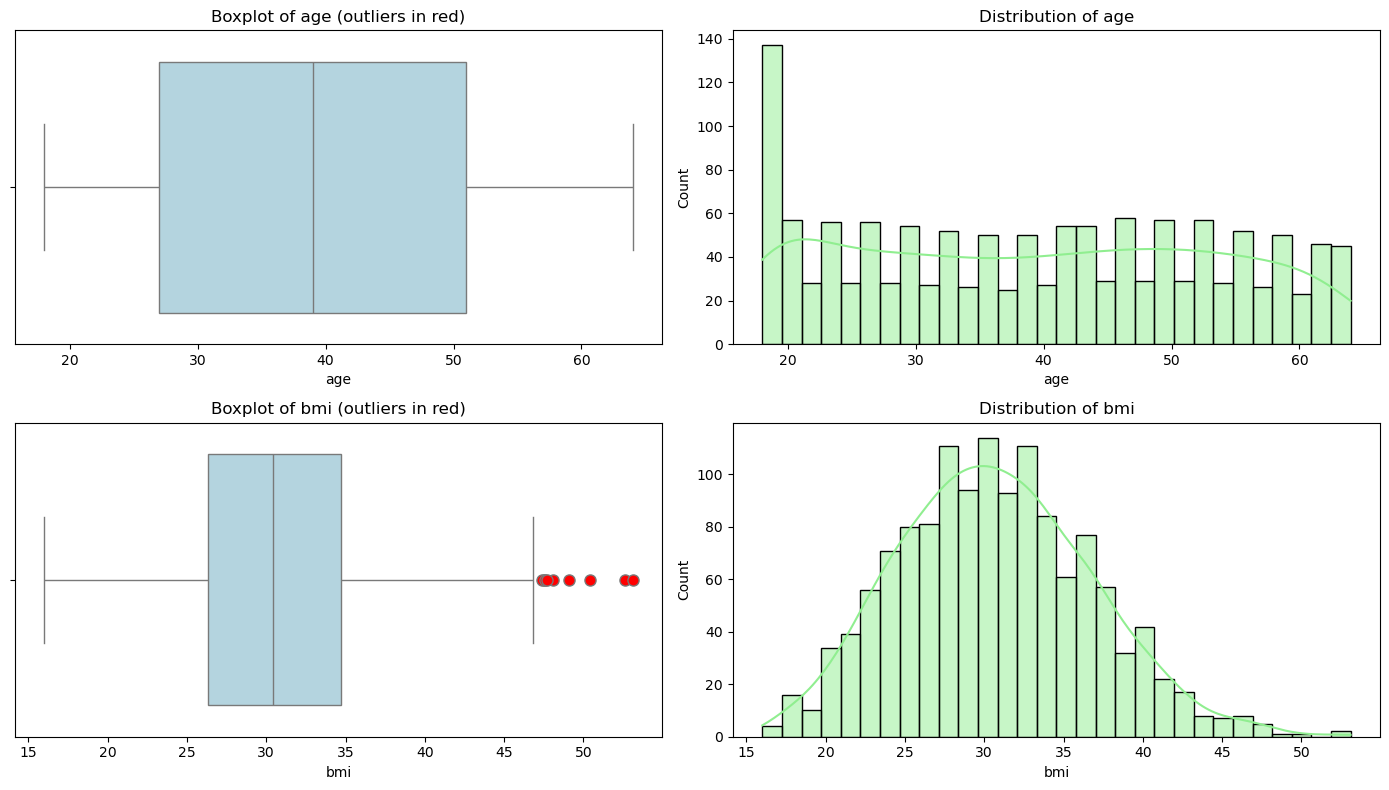

In [18]:
num_features = ['age', 'bmi']
n_features = len(num_features)

# Set up the figure: 2 columns per feature (boxplot + histogram)
fig, axes = plt.subplots(n_features, 2, figsize=(14, 4 * n_features))

for i, col in enumerate(num_features):
    # Boxplot with outliers highlighted
    sns.boxplot(x=df[col], ax=axes[i, 0], color='lightblue', flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    axes[i, 0].set_title(f'Boxplot of {col} (outliers in red)')

    # Histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



- we can see that there are no outliers present in age column

- Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data

In [19]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.699999999999998
47.300000000000004


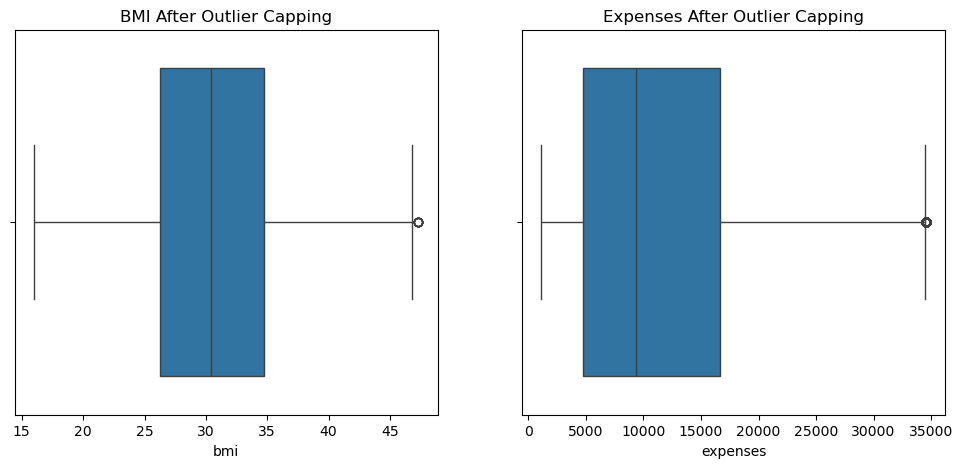

In [20]:
# Import libraries
#pip install feature_engine
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import ArbitraryOutlierCapper

# ----  Cap outliers in BMI ----
bmi_capper = ArbitraryOutlierCapper(
    min_capping_dict={'bmi': 13.6749},
    max_capping_dict={'bmi': 47.315}
)
df[['bmi']] = bmi_capper.fit_transform(df[['bmi']])

# ----  Cap outliers in Expenses ----
expenses_capper = ArbitraryOutlierCapper(
    min_capping_dict={'expenses': -13120.73},  # <-- change key to 'expenses'
    max_capping_dict={'expenses': 34524.79}
)
df[['expenses']] = expenses_capper.fit_transform(df[['expenses']])

# ----  Visualize results ----
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['bmi'], ax=ax[0])
ax[0].set_title("BMI After Outlier Capping")

sns.boxplot(x=df['expenses'], ax=ax[1])
ax[1].set_title("Expenses After Outlier Capping")

plt.show()


Now we successfully treated the outliers .

In [21]:
print(df['bmi'].skew())
print(df['age'].skew())

0.2335347608856934
0.05567251565299186


Skewness before log transform: 1.0852024593443712
Applied log transformation. New skewness: -0.22279977034884946


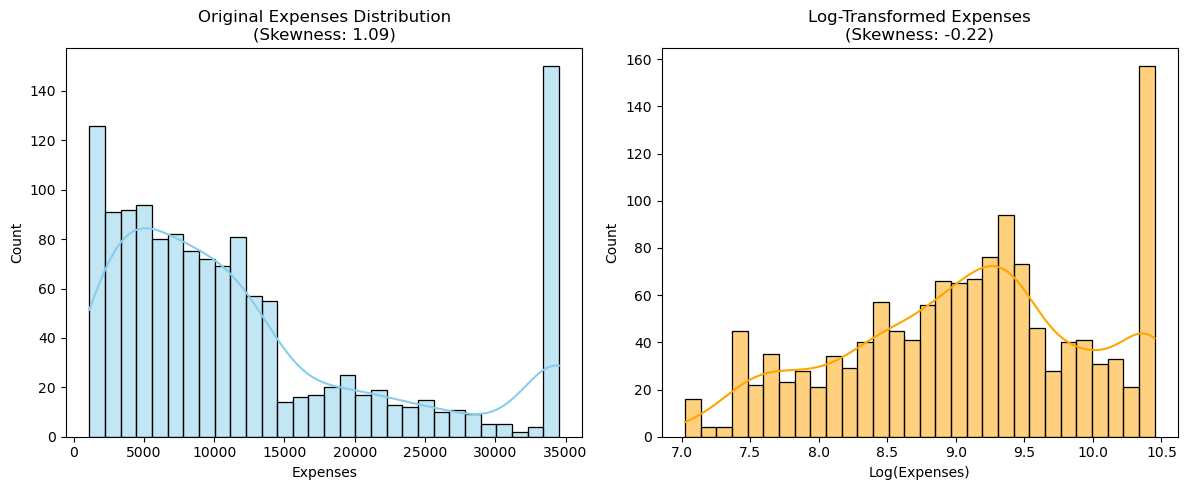

In [22]:
#  Check skewness before transformation
print("Skewness before log transform:", df['expenses'].skew())

#  Apply log transformation only if highly skewed
if df['expenses'].skew() > 1:
    df['log_expenses'] = np.log1p(df['expenses'])
    print("Applied log transformation. New skewness:", df['log_expenses'].skew())

#  Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.histplot(df['expenses'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"Original Expenses Distribution\n(Skewness: {df['expenses'].skew():.2f})")
axes[0].set_xlabel("Expenses")

# Log-transformed distribution
if 'log_expenses' in df.columns:
    sns.histplot(df['log_expenses'], bins=30, kde=True, ax=axes[1], color="orange")
    axes[1].set_title(f"Log-Transformed Expenses\n(Skewness: {df['log_expenses'].skew():.2f})")
    axes[1].set_xlabel("Log(Expenses)")

plt.tight_layout()
plt.show()

Skewness = 1.08 (right-skewed) → The data is asymmetric, which can affect statistical analyses and ML models

Skewness = -0.22 (almost symmetrical) better for analysis and predictive modeling

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,claim_description,medical_notes,feedback,log_expenses
0,19,female,27.9,0,yes,southwest,16884.92,Slip and fall - minor fracture,"Smoker, higher risk of lung issues. Overweight...",Happy with quick approval,9.734235
1,18,male,33.8,1,no,southeast,1725.55,Doctor visit for checkup,"Obese, potential risk for heart disease. Asthm...",Simple and efficient service,7.453880
2,28,male,33.0,3,no,southeast,4449.46,Small medical claim for prescription,"Obese, potential risk for heart disease. Diabe...","Quick claim, no issues",8.400763
3,33,male,22.7,0,no,northwest,21984.47,Hospital stay for routine surgery,Healthy weight range. History of hypertension,Happy with quick approval,9.998137
4,32,male,28.9,0,no,northwest,3866.86,Minor injury claim,"Overweight, moderate health risk. Diabetes und...","Quick claim, no issues",8.260457


4. Feature Selection

Encoding

encoding is to be done for discrete categorical data (sex,bmi,region).

In [24]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,claim_description,medical_notes,feedback,log_expenses
0,19,1,27.9,0,1,3,16884.92,Slip and fall - minor fracture,"Smoker, higher risk of lung issues. Overweight...",Happy with quick approval,9.734235
1,18,0,33.8,1,0,2,1725.55,Doctor visit for checkup,"Obese, potential risk for heart disease. Asthm...",Simple and efficient service,7.453880
2,28,0,33.0,3,0,2,4449.46,Small medical claim for prescription,"Obese, potential risk for heart disease. Diabe...","Quick claim, no issues",8.400763
3,33,0,22.7,0,0,0,21984.47,Hospital stay for routine surgery,Healthy weight range. History of hypertension,Happy with quick approval,9.998137
4,32,0,28.9,0,0,0,3866.86,Minor injury claim,"Overweight, moderate health risk. Diabetes und...","Quick claim, no issues",8.260457


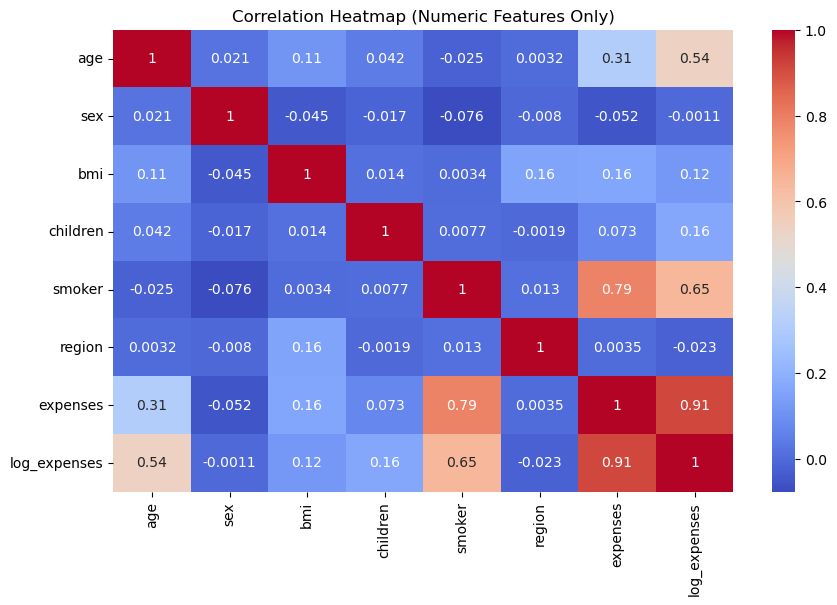

In [26]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation
corr_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


Text Preprocessing

In [27]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
# Download necessary NLTK data (first time only)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove special characters, numbers, punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 6. Join tokens back to string
    text_clean = " ".join(tokens)
    
    return text_clean


# Apply preprocessing to text columns
text_features = ['claim_description', 'medical_notes', 'feedback']
for col in text_features:
    df[f'{col}_clean'] = df[col].apply(preprocess_text)  # note the f-string

# Check results
df[['claim_description', 'claim_description_clean']].head()
df[['medical_notes', 'medical_notes_clean']].head()
df[['feedback', 'feedback_clean']].head()


,feedback,feedback_clean
0,Happy with quick approval,happy quick approval
1,Simple and efficient service,simple efficient service
2,"Quick claim, no issues",quick claim issue
3,Happy with quick approval,happy quick approval
4,"Quick claim, no issues",quick claim issue


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf_claim = TfidfVectorizer(max_features=200)
tfidf_medical = TfidfVectorizer(max_features=200)
tfidf_feedback = TfidfVectorizer(max_features=100)

X_claim = tfidf_claim.fit_transform(df['claim_description_clean'])
X_medical = tfidf_medical.fit_transform(df['medical_notes_clean'])
X_feedback = tfidf_feedback.fit_transform(df['feedback_clean'])


In [31]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,claim_description,medical_notes,feedback,log_expenses,claim_description_clean,medical_notes_clean,feedback_clean
0,19,1,27.9,0,1,3,16884.92,Slip and fall - minor fracture,"Smoker, higher risk of lung issues. Overweight...",Happy with quick approval,9.734235,slip fall minor fracture,smoker higher risk lung issue overweight moder...,happy quick approval
1,18,0,33.8,1,0,2,1725.55,Doctor visit for checkup,"Obese, potential risk for heart disease. Asthm...",Simple and efficient service,7.453880,doctor visit checkup,obese potential risk heart disease asthma obse...,simple efficient service
2,28,0,33.0,3,0,2,4449.46,Small medical claim for prescription,"Obese, potential risk for heart disease. Diabe...","Quick claim, no issues",8.400763,small medical claim prescription,obese potential risk heart disease diabetes co...,quick claim issue
3,33,0,22.7,0,0,0,21984.47,Hospital stay for routine surgery,Healthy weight range. History of hypertension,Happy with quick approval,9.998137,hospital stay routine surgery,healthy weight range history hypertension,happy quick approval
4,32,0,28.9,0,0,0,3866.86,Minor injury claim,"Overweight, moderate health risk. Diabetes und...","Quick claim, no issues",8.260457,minor injury claim,overweight moderate health risk diabetes control,quick claim issue


In [32]:
df.drop(columns=['claim_description', 'medical_notes', 'feedback'], inplace=True)
df.head()


,age,sex,bmi,children,smoker,region,expenses,log_expenses,claim_description_clean,medical_notes_clean,feedback_clean
0,19,1,27.9,0,1,3,16884.92,9.734235,slip fall minor fracture,smoker higher risk lung issue overweight moder...,happy quick approval
1,18,0,33.8,1,0,2,1725.55,7.453880,doctor visit checkup,obese potential risk heart disease asthma obse...,simple efficient service
2,28,0,33.0,3,0,2,4449.46,8.400763,small medical claim prescription,obese potential risk heart disease diabetes co...,quick claim issue
3,33,0,22.7,0,0,0,21984.47,9.998137,hospital stay routine surgery,healthy weight range history hypertension,happy quick approval
4,32,0,28.9,0,0,0,3866.86,8.260457,minor injury claim,overweight moderate health risk diabetes control,quick claim issue


In [33]:
from sklearn.preprocessing import StandardScaler

# Structured features
structured = df[['age','bmi','children','sex','smoker','region']]
scaler = StandardScaler()
structured_scaled = scaler.fit_transform(structured)

In [34]:
# Combine
X = hstack([structured_scaled, X_claim, X_medical, X_feedback])
y = df['log_expenses']  # target

5. Model Development

In [35]:
X

<COOrdinate sparse matrix of dtype 'float64'
	with 26590 stored elements and shape (1338, 90)>

In [36]:
y

0        9.734235
1        7.453880
2        8.400763
3        9.998137
4        8.260457
          ...    
1333     9.268755
1334     7.699380
1335     7.396844
1336     7.605367
1337    10.279948
Name: log_expenses, Length: 1338, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
## Separate the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape

((1070, 90), (268, 90))

In [40]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21270 stored elements and shape (1070, 90)>

In [41]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5320 stored elements and shape (268, 90)>

In [42]:
import sys
print(sys.executable)


c:\Users\indra\anaconda3\python.exe


In [43]:
# !conda install -c conda-forge xgboost --yes

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,y,cv=5,)).mean()
 l3.append(cvs)

In [46]:
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.843639,0.845998,0.836399
1,0.847989,0.828750,0.836399
2,0.839936,0.861064,0.836399
3,0.852162,0.807793,0.836399
4,0.845714,0.841839,0.836399
5,0.843153,0.850475,0.836399
6,0.837946,0.869841,0.836399
7,0.844478,0.843993,0.836399
8,0.843766,0.844618,0.836399
9,0.841730,0.851828,0.836399


In [47]:
## Create a function to evaluate the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [48]:
## Beginning of model training


models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

In [49]:


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

    print(f'Model: {list(models.keys())[i]}')

    print("Model Performance on Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))
    

    print("-----------------------------------")

    print("Model Performance on Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    

    print('='*35)
    print('\n')

Model: Linear Regression
Model Performance on Training Set
- Root Mean Squared Error: 0.3516
- Mean Absolute Error: 0.2836
- R2 Score: 0.8399
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 0.3403
- Mean Absolute Error: 0.2686
- R2 Score: 0.8611


Model: Lasso
Model Performance on Training Set
- Root Mean Squared Error: 0.8788
- Mean Absolute Error: 0.7127
- R2 Score: 0.0000
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 0.9161
- Mean Absolute Error: 0.7607
- R2 Score: -0.0067


Model: Ridge
Model Performance on Training Set
- Root Mean Squared Error: 0.3519
- Mean Absolute Error: 0.2834
- R2 Score: 0.8397
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 0.3401
- Mean Absolute Error: 0.2675
- R2 Score: 0.8613


Model: KNN
Model Performance on Training Set
- Root Mean Squared Error: 0.2386
- Mean Absolute Error: 0.1581
- R2 Score: 0.9263
-------

In [50]:
# Lists to store results
algorithms = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_tr, rmse_tr, r2_tr = evaluate_model(y_train, y_train_pred)
    mae_te, rmse_te, r2_te = evaluate_model(y_test, y_test_pred)
    
    algorithms.append(name)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
    train_mae.append(mae_tr)
    test_mae.append(mae_te)
    train_r2.append(r2_tr)
    test_r2.append(r2_te)

# Create DataFrame
performance_df = pd.DataFrame({
    "Algorithm": algorithms,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train R2": train_r2,
    "Test R2": test_r2
})

# Sort by Test RMSE ascending (best first)
performance_df = performance_df.sort_values("Test RMSE", ascending=True).reset_index(drop=True)

# Display nicely
print("===== Ranked Models by Test RMSE =====\n")
print(performance_df.to_string(index=False, float_format="%.4f"))

===== Ranked Models by Test RMSE =====

        Algorithm  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2  Test R2
    Random Forest      0.0703     0.1810     0.0337    0.0814    0.9936   0.9607
          XGBoost      0.0120     0.1823     0.0081    0.0950    0.9998   0.9602
Gradient Boosting      0.1637     0.2073     0.0992    0.1148    0.9653   0.9485
    Decision Tree      0.0000     0.2316     0.0000    0.1029    1.0000   0.9357
              KNN      0.2386     0.3218     0.1581    0.2064    0.9263   0.8758
         AdaBoost      0.3201     0.3266     0.2634    0.2662    0.8673   0.8721
            Ridge      0.3519     0.3401     0.2834    0.2675    0.8397   0.8613
Linear Regression      0.3516     0.3403     0.2836    0.2686    0.8399   0.8611
            Lasso      0.8788     0.9161     0.7127    0.7607    0.0000  -0.0067


In [51]:
 # Inilialize few parameters for hyperparameter tuning
# Define XGBoost hyperparameter grid
xgb_params = { 
    'n_estimators': [100, 200, 300, 500], 
    'max_depth': [3, 5, 7, 10], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'subsample': [0.6, 0.7, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0] 
}
rf_params = {
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['auto', 'sqrt', 5, 7, 10],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 300, 500, 1000]
}

In [52]:
# Models list for hyperparameter tuning
randomcv_models = [
    ('XGB', XGBRegressor(), xgb_params),
    ('Random Forest', RandomForestRegressor(), rf_params)
]

In [53]:
xgb_params

{'n_estimators': [100, 200, 300, 500],
 'max_depth': [3, 5, 7, 10],
 'learning_rate': [0.01, 0.05, 0.1, 0.2],
 'subsample': [0.6, 0.7, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.7, 0.8, 1.0]}

In [54]:
rf_params

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt', 5, 7, 10],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 300, 500, 1000]}

In [55]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params, n_iter=100, cv=3, verbose=2,n_jobs=-1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"---------------------Best Parameters for {model_name}---------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------Best Parameters for XGB---------------------
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
---------------------Best Parameters for Random Forest---------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 10, 'max_depth': 80}


In [57]:
# Retrain models using best parameters from hyperparameter tuning
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        max_features=10,
        max_depth=80,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        max_depth=10,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.8,
        random_state=42
    )
}

# Train, predict and evaluate
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

    print(f'Model: {list(models.keys())[i]}')

    print("Model Performance on Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print("-----------------------------------")

    print("Model Performance on Testing Set")
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))

    print('='*35)
    print('\n')


Model: Random Forest
Model Performance on Training Set
- Root Mean Squared Error: 0.0882
- Mean Absolute Error: 0.0627
- R2 Score: 0.9899
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 0.2358
- Mean Absolute Error: 0.1648
- R2 Score: 0.9333


Model: XGBoost
Model Performance on Training Set
- Root Mean Squared Error: 0.0048
- Mean Absolute Error: 0.0032
- R2 Score: 1.0000
-----------------------------------
Model Performance on Testing Set
- Root Mean Squared Error: 0.1734
- Mean Absolute Error: 0.0804
- R2 Score: 0.9639




In [73]:
import pickle

# Prepare a dictionary with all components
pipeline = {
    'model': models['XGBoost'],  # your best model
    'scaler': scaler,
    'tfidf_claim': tfidf_claim,
    'tfidf_medical': tfidf_medical,
    'tfidf_feedback': tfidf_feedback
}

# Save to a single pickle file
with open('insurance_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("All components saved in 'insurance_pipeline.pkl' successfully!")


All components saved in 'insurance_pipeline.pkl' successfully!


 Model saved successfully as 'insurance_model.pkl'
 Model loaded successfully
